# Übungszettel 4: Eigenfaces, Clustering

## Maschinelles Lernen - WiSe 23/24

### Abgabe 15.11.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen.

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np



---

## Aufgabe 1 - Eigenfaces

In dieser Aufgabe beschäftigen wir uns mit der Hauptkomponentenanalyse (Principal Component Analysis, PCA) am Beispiel von *Eigenfaces*. Dieses ist ein frühes Verfahren zur automatisierten Gesichtserkennung. Als Datensatz für die Gesichtserkennung wird Labeled Faces in the Wild (LFW) verwendet (http://vis-www.cs.umass.edu/fddb/).

In *Eigenfaces* werden die Bilder von Gesichtern kompakt repräsentiert durch die wichtigsten Hauptkomponenten als Basisvektoren. Um ein unbekanntes Gesicht zu klassifizieren, wird dieses in den durch die Eigenfaces (Eigenvektoren) erzeugten Eigenraum projiziert. Dann kann der Abstand (z.B. Euklidischer Abstand) zu den Bildern in der Datenbank gemessen werden und z.B. mittels Nearest-Neighbor-Suche klassifiziert werden. 

a) Geben Sie die Anzahl der Personen, die Gesamtzahl von Bildern, die Abmessungen der Bilder und die Anzahl von Features (in diesem Fall Pixel) pro Bild aus. Visualisieren Sie ein zufälliges Gesicht aus LFW zusammen mit dem dazugehörigen Namen.

In [ ]:

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.5)

random_person_index = np.random.randint(anzahl_bildern)
person_bild = lfw_people.images[random_person_index]
person_name = lfw_people.target_names[lfw_people.target[random_person_index]]

plt.imshow(random_face, cmap='gray')
plt.title("Name : " + random_name)
plt.show()


anzahl_personen = len(lfw_people.target_names) 
anzahl_bildern = len(lfw_people.images)
groesse_bilder = lfw_people.images.shape[1:]
anzahl_features = np.prod(image_dimensions)
print("Anzahl der Personen : " + str(anzahl_personen))
print("Anzahl der Bildern : " + str(anzahl_bildern))
print("Größe der Bildern : " + str(groesse_bilder))
print("Pixel : " + str(anzahl_features))


b) Teilen Sie den Datensatz in Training- und Testdatensatz. Der Testdatensatz soll jeweils 10% der Bilder einer Person enthalten, der Trainingsdatensatz die restlichen Bilder. Nutzen Sie hierzu eine Methode aus `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split

x_training,x_test,y_training,y_test = train_test_split(
    lfw_people.data,   # x (Data)
    lfw_people.target, # y(label)
    test_size = 0.1
)

c) Berechnen Sie das Mean Bild auf den Trainingsdaten und visualisieren Sie es.  

In [ ]:
mean_image = np.mean(x_training, axis=0)
print(mean_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(mean_image.reshape(62, 47),cmap='gray')  
plt.title('Mean Image')
plt.show()

d) Schreiben Sie eine Methode `pca` die als Eingabe `dataset`, eine Menge von Eingabe-Vektoren, und `q` die Anzahl der Eigenvektoren erhält. Führen Sie in der Methode dann eine PCA auf den Eingabedaten durch und liefern Sie ein Tupel zurück mit folgendem Inhalt:

* Projektionsmatrix (Eigenvektoren mit gen größten Eigenwerten) mit Shape (q, #Anzahl Features)
* q Eigenwerte absteigend sortiert

Gehen Sie wie folgt vor:

1. Standardisieren Sie alle Features 
2. Berechnen Sie die Kovarianzmatrix
3. Bestimmen Sie die Eigenwerte und Eigenvektoren (*Tipp:* Nutzen Sie eine Methode für symmetrische Matrizen)
4. Konstruieren Sie die Projektionsmatrix aus den q Eigenvektoren mit den größten Eigenwerten

Für diese Methode sollen nur Methoden aus `numpy` benutzt werden.

In [ ]:
def pca(dataset,q) :
    standardisiert_data = (dataset - np.mean(dataset,axis=0)) / np.std(dataset,axis=0)
    kovarianzmatrix = np.cov(standardisiert_data,rowvar = 'false')
    eigenvalues, eigenvectors = np.linalg.eigh(kovarianzmatrix)
    absteigend_values = np.argsort(eigenvalues)[::-1]  #Durch argsort aufsteigend sortierte Werte werden von [::-1] geflippt(Also Abstegigend)
    top_q_values = absteigend_values[:q]
    projektion_matrix = eigenvectors[:, top_q_values] #Top q values in jeden Zeilen werden ausgewählt
    return projektion_matrix, eigenvalues[top_q_values]

e) Extrahieren Sie die ersten 100 Eigenfaces (Eigenvektoren) aus dem Trainingsdatensatz mittels PCA. Visualisieren Sie die ersten 20 Eigenfaces.

In [ ]:
print(x_training.shape)
projektion_matrix,eigenvalues = pca(x_training,100)
print(projektion_matrix.shape)



plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    #assert np.prod(image_dimensions) == 1026, "Invalid image dimensions"
    eigenface = projektion_matrix[:, i].reshape((27, 38))
    plt.imshow(eigenface, cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')

plt.suptitle('First 20 Eigenfaces')
plt.show()

f) Plotten Sie die ersten 50 (normalisierten) Eigenwerte als Balkendiagramm. Visualisieren Sie auch die kumulativen Varianzen der Hauptkomponenten.
Wählen Sie basierend auf dieser Visualisierung die Anzahl `n_pcs` der Hauptkomponenten, die Sie für die Repräsentation der Gesichter nutzen möchten. Begründen Sie Ihre Entscheidung.

In [ ]:
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 51), eigenvalues[:50] / np.sum(eigenvalues))
plt.plot(range(1, 51), cumulative_variance_ratio[:50], color='green', marker='x', linestyle=':', markersize=6, label='Cumulative Variance Ratio')
plt.xlabel('Eigenface Number')
plt.ylabel('Variance Ratio')
plt.title('Eigenvalues and Cumulative Variance Ratio')
plt.legend()
plt.show()


g) Nutzen Sie die Projektionsmatrix, die Sie mit der `pca` Methode aus Aufgabenteil d) erhalten haben um den Testdatensatz in einen Raum mit niedrigerer Dimension zu projezieren. Dazu multiplizieren Sie die Projektionsmatrix mit dem Testdatensatz. Visualisieren Sie dann 5 zufällige rekonstruierte Gesichter aus dem Testdatensatz. Für die Rekonstruktion multiplizieren Sie die PCA-transformierten Daten mit der Projektionsmatrix.

Nutzen Sie als Projektionsmatrix jeweils:
* die ersten 4 Eigenvektoren
* die ersten `n_pcs` Eigenvektoren
* alle 100 Eigenvektoren (also die komplette Projektionsmatrix)

In [ ]:

print(x_test.shape)
print(projektion_matrix.shape[1])
print(projektion_matrix[:, :4].shape)
from sklearn.preprocessing import StandardScaler

cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
n_pcs = np.argmax(cumulative_variance_ratio >= 0.9) + 1

projektion_matrix_4,eigenvalues_4 = pca(x_training,4)
print(projektion_matrix_4.shape)
projektion_matrix_n_pcs,eigenvalues_n_pcs = pca(x_training,n_pcs)
print(projektion_matrix_n_pcs.shape)
projektion_matrix_100,eingenwerte_100 = pca(x_test,100)
print(projektion_matrix_100.shape)

X_test_pca = np.dot(x_test, projektion_matrix_n_pcs[:, :n_pcs])



X_reconstructed_4 = np.dot(x_test_pca_4, projektion_matrix[:, :4].T)
X_reconstructed_n = np.dot(x_test_pca_n, projektion_matrix[:, :n_pcs].T)
X_reconstructed_all = np.dot(x_test_pca_all, projektion_matrix[:, :100].T)

for i in range(5):
    idx = np.random.randint(len(x_test))

    plt.figure(figsize=(8, 4))

  
    plt.subplot(1, 4, 1)
    plt.imshow(x_test[idx].reshape(image_dimensions), cmap='gray')
    plt.title('Original')

  
    plt.subplot(1, 4, 2)
    plt.imshow(X_reconstructed_4[idx].reshape(image_dimensions), cmap='gray')
    plt.title('4 Principal Components')

 
    plt.subplot(1, 4, 3)
    plt.imshow(X_reconstructed_n[idx].reshape(image_dimensions), cmap='gray')
    plt.title(f'{n_pcs} Principal Components')

    plt.subplot(1, 4, 4)
    plt.imshow(X_reconstructed_all[idx].reshape(image_dimensions), cmap='gray')
    plt.title('All Principal Components')

    plt.show()

h) Nun sollen die Bilder aus dem Testdatensatz klassifiziert werden. Gehen Sie dazu wie folgt vor: Transformieren Sie sowohl die Test- als auch die Trainingsdaten, indem Sie die vollständige Projektionsmatrix aus Aufgabenteil d) nutzen. Wählen Sie dann 3 zufällige Vektoren aus dem transformierten Testdatensatz. Berechnen Sie die euklidische Distanz zu allen Vektoren im Trainingsdatensatz.
Visualisieren Sie dann das jeweilige Gesicht und geben Sie jeweils die zugehörigen Namen der 5 nächsten Nachbarn zusammen mit der Distanz aus.

i) Bei der Klassifizierung in Aufgabenteil h) treten häufig Fehler auf. Woran könnte das liegen?

---
## Aufgabe 2 - K-Means

a) Wenden Sie in diesem Aufgabenteil das K-Means-Verfahren von Hand an. Es sind folgende Datenpunkte im euklidischen Raum gegeben:

| Punkt   | X     | Y     |
| :------ |------:|------:| 
| A       | 1.2   | 0.8   |
| B       | -0.6  | -1.3  |
| C       | -0.8  | 0.2   |
| D       | 0.2   | 0.3   |

Punkt A und C werden initial zu den Clusterzentroid C1, Punkte B und D initial zu den Clusterzentroid C2
zugeordnet.

Ermitteln sie die Minimal-Distanz-Partition unter der Anwendung des K-Means-Verfahrens und der euklidischen Distanz. Starten Sie, in dem Sie erst die jeweiligen Clusterschwerpunkte ermitteln.

- Bestimme Clusterschwerpunkte:
    Für $C_1$ ist der mittelpunkt $m_{C_1}=\Big(\frac{1.2-0.8}{2},\frac{0.8+0.2}{2}\Big) = (0.2,0.5)$.
    Für $C_2$ ist der mittelpunkt $m_{C_2}=\Big(\frac{-0.6+0.2}{2},\frac{-1.3+0.3}{2}\Big) = (-0.2,-0.5)$.

- Bestimme euklidischen Distanzen jewiliger Punkte:
    - Für $A$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(1.2-0.2)^2+(0.8-0.5)^2} \approx 1.0440$
    - Für $A$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(1.2+0.2)^2+(0.8+0.5)^2} \approx 1.9105 $
    $\Rightarrow A$ bleibt in Cluster $C_1$.
    - Für $B$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(-0.6-0.2)^2+(-1.3-0.5)^2} \approx 1.9698 $
    - Für $B$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(-0.6+0.2)^2+(-1.3+0.5)^2} \approx 0.8944 $
    $\Rightarrow B$ bleibt in Cluster $C_2$.
    - Für $C$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(-0.8-0.2)^2+(0.2-0.5)^2} \approx 1.0440$
    - Für $C$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(-0.8+0.2)^2+(0.2+0.5)^2} \approx 0.9220$
    $\Rightarrow C$ wird in Cluster $C_2$ zugeordnet.
    - Für $D$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(0.2-0.2)^2+(0.3-0.5)^2} = 0.2 $
    - Für $D$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(0.2+0.2)^2+(0.3+0.5)^2} \approx 0.8944 $
    $\Rightarrow D$ wird in Cluster $C_1$ zugeordnet.

- Update Clusterschwerpunkt:
    Für $C_1$ ist der mittelpunkt $m_{C_1}=\Big(\frac{1.2+0.2}{2},\frac{0.8+0.3}{2}\Big) = (0.7,0.55)$.
    Für $C_2$ ist der mittelpunkt $m_{C_2}=\Big(\frac{-0.6-0.8}{2},\frac{-1.3+0.2}{2}\Big) = (-0.7,-0.55)$.

- Bestimme euklidischen Distanzen jewiliger Punkte:
    - Für $A$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(1.2-0.7)^2+(0.8-0.55)^2} \approx 0.5590$
    - Für $A$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(1.2+0.7)^2+(0.8+0.55)^2} \approx 2.3308 $
    $\Rightarrow A$ bleibt in Cluster $C_1$.
    - Für $B$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(-0.6-0.7)^2+(-1.3-0.55)^2} \approx 2.2611 $
    - Für $B$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(-0.6+0.7)^2+(-1.3+0.55)^2} \approx 0.7566 $
    $\Rightarrow B$ bleibt in Cluster $C_2$.
    - Für $C$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(-0.8-0.7)^2+(0.2-0.55)^2} \approx 1.5403$
    - Für $C$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(-0.8+0.7)^2+(0.2+0.55)^2} \approx 0.7566$
    $\Rightarrow C$ bleibt in Cluster $C_2$.
    - Für $D$ ist der euklidische Distanz von $m_{C_1}: \sqrt{(0.2-0.7)^2+(0.3-0.55)^2} \approx 0.5590 $
    - Für $D$ ist der euklidische Distanz von $m_{C_2}: \sqrt{(0.2+0.7)^2+(0.3+0.55)^2} \approx 1.2379 $
    $\Rightarrow D$ bleibt in Cluster $C_1$.

$\Rightarrow $ Minimal-Distanz-Partition erreicht, wenn die Punkte $A$ und $D$ im Cluster $C_1$ liegen, während die Punkte $B$ und $C$ im Cluster $C_2$ sind.


b) Beschreiben Sie kurz wofür Silhouetten berechnet werden. 

Silhouetten werden intern evaluiert, um die Zusammengehörigkeit von Datenpunkten zu ihren Clustern zu bewerten und die Trennschärfe zwischen den Clustern zu beurteilen.

c) Was bedeuten negative Werte und was gibt der Silhouetten Koeffizient an? 

Der Silhouettenkoeffizient bewertet, wie gut Datenpunkte zu ihren Clustern passen und ob die Cluster voneinander getrennt sind. Negative Werte deuten auf unklare oder überlappende Cluster hin, während ein Wert nahe 1 für gut definierte Cluster steht.
 

d) Berechnen Sie den Silhouetten Koeffizienten für die Cluster aus Aufgabenteil a) von Hand. 

$C_1$:

| Punkt   | X     | Y     |
| :------ |------:|------:| 
| A       | 1.2   | 0.8   |
| D       | 0.2   | 0.3   |

$C_2$:

| Punkt   | X     | Y     |
| :------ |------:|------:| 
| B       | -0.6  | -1.3  |
| C       | -0.8  | 0.2   |

Zum Punkt $A$:
$a(A)=\frac{1}{2-1}\cdot\sqrt{(1.2-0.2)^2+(0.8-0.3)^2} \approx 1.118033989 $
$b(A)=\frac{1}{2}\cdot(\sqrt{(1.2+0.6)^2+(0.8+1.3)^2} + \sqrt{(1.2+0.8)^2+(0.8-0.2)^2}) \approx 2.426962319 $
$\Rightarrow s(A)=\frac{2.426962319-1.118033989}{2.426962319} \approx 0.539327833 $

Zum Punkt $D$:
$a(D)=\frac{1}{2-1}\cdot\sqrt{(1.2-0.2)^2+(0.8-0.3)^2} \approx 1.118033989 $
$b(D)=\frac{1}{2}\cdot(\sqrt{(0.2+0.6)^2+(0.3+1.3)^2} + \sqrt{(0.2+0.8)^2+(0.3-0.2)^2}) \approx 1.396920972 $
$\Rightarrow s(D)=\frac{1.396920972-1.118033989}{1.396920972} \approx 0.199644066 $

Zum Cluster 1 ($A$ und $D$):
$SC_1 = (0.539327833+0.199644066)/2 = 0.369485949 $


e) Lesen Sie die Datei `clustering.csv` ein und wenden Sie den K-Means Algorithmus (aus `sklearn`) jeweils für $k=\{2,3,6,10\}$ an. 
Führen Sie für jedes $k$ eine Silhouttenanalyse durch (Visualisierung). Wählen Sie schließlich ein geeignetes `k` und visualisieren Sie dafür das Ergebnis als Scatterplot, sodass erkennbar ist, welcher Punkt zu welchem Cluster gehört.

c:\Users\z004um8m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


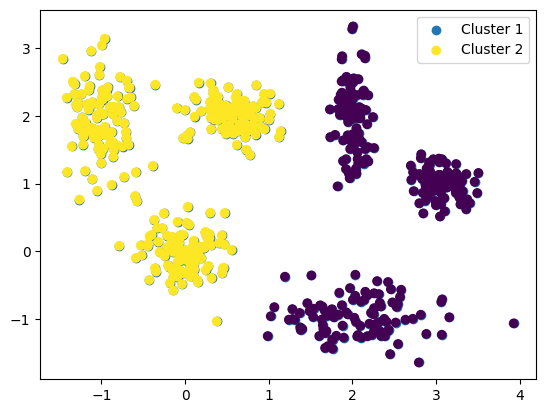

In [25]:
#path
path = 'clustering.csv'

#read file
data =  pd.read_csv(path, names=['X','Y'])

#plot data
#plt.subplots(figsize=(8, 6))
plt.scatter(data['X'], data['Y'])

# using k means to cluster the data

# create a KMeans object with k clusters
kmeans_1 = KMeans(n_clusters = 2)
# fit the data to the KMeans object
kmeans_1.fit(data)

# get the labels for each data point
labels = kmeans_1.labels_

# plot the data with different colors for each cluster
plt.scatter(data['X'], data['Y'], c=labels)
plt.legend(labels=['Cluster 1', 'Cluster 2'])
plt.show()


c:\Users\z004um8m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


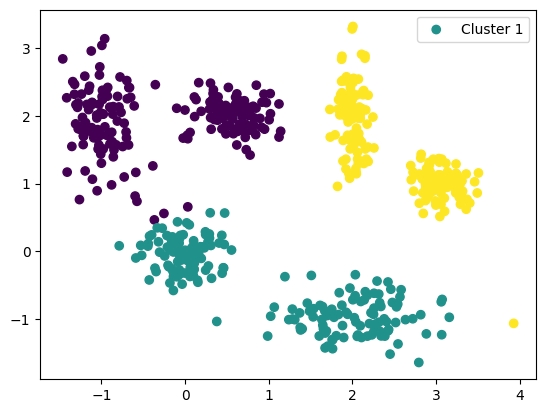

In [26]:
# create a KMeans object with k clusters
kmeans_1 = KMeans(n_clusters = 3)
# fit the data to the KMeans object
kmeans_1.fit(data)

# get the labels for each data point
labels = kmeans_1.labels_

# plot the data with different colors for each cluster
plt.scatter(data['X'], data['Y'], c=labels)
plt.legend(labels=['Cluster 1', 'Cluster 2'])
plt.show()

c:\Users\z004um8m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


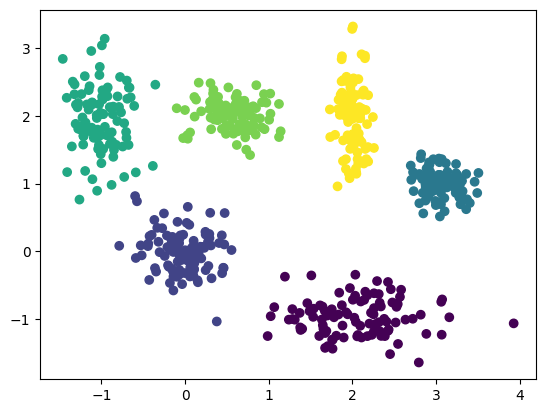

In [27]:
# create a KMeans object with k clusters
kmeans_1 = KMeans(n_clusters = 6)
# fit the data to the KMeans object
kmeans_1.fit(data)
# get the labels for each data point
labels = kmeans_1.labels_
# plot the data with different colors for each cluster
plt.scatter(data['X'], data['Y'], c=labels)
plt.show()

c:\Users\z004um8m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


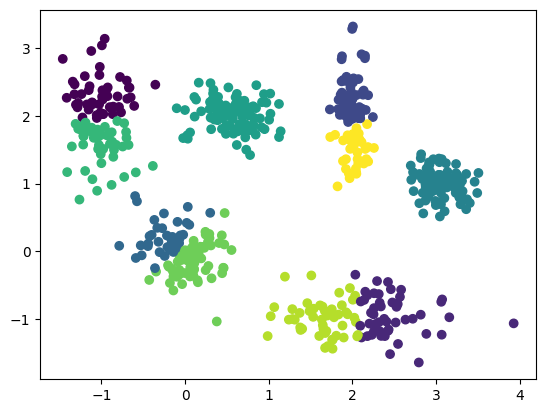

In [28]:
# create a KMeans object with k clusters
kmeans_1 = KMeans(n_clusters = 10)
# fit the data to the KMeans object
kmeans_1.fit(data)
# get the labels for each data point
labels = kmeans_1.labels_
# plot the data with different colors for each cluster
plt.scatter(data['X'], data['Y'], c=labels)
plt.show()

---
## **Aufgabe 3: Hierarchisches Clustering (bewertet: 2,5+0,5+0,5+1+0,5 Punkte)**

a) Berechnen Sie ein Hierarchisches Clustering aus der folgenden Distanzmatrix mit der Methode
Average Linkage von Hand. Zeichnen Sie das entsprechende Dendrogramm. 

|        | A    | B    | C     | D     |
|--------|------|------|-------|-------|
| **A**  | 0    |      |       |       |
| **B**  | 4.438|0     |       |       |
| **C**  | 3.048|6.777 |0      |       |
| **D**  | 2.259|2.887 |4.339  |0      |

Die Distanz zwischen $A$ und $D$ ist am kleinsten $\Rightarrow (A,D)$ formt ein Cluster.
Zum Updaten:
- $dist((A,D),B)=\frac{dist(A,B)+dist(D,B)}{2}=\frac{4.438+2.887}{2}=3.6625$
- $dist((A,D),C)=\frac{dist(A,C)+dist(D,C)}{2}=\frac{3.048+4.339}{2}=3.6935$
Dann ist die Distanzmatrix wie folgt:

|       | (A,D)  | B    | C     |
|-------|--------|------|-------|
| (A,D) | 0      |      |       |
| B     | 3.6625 |0     |       |
| C     | 3.6935 |6.777 |0      |

Die Distanz zwischen $(A,D)$ und $B$ ist am kleinsten $\Rightarrow (A,D,B)$ formt ein Cluster.
Zum Updaten:
- $dist((A,D,B),C)=\frac{dist((A,D),C)+dist(B,C)}{2}=\frac{3.6935+6.777}{2}=5.23525$
Dann ist die Distanzmatrix wie folgt:

|         | (A,D,B) | C |
|---------|---------|---|
| (A,D,B) | 0       |   |
| C       | 5.23525  | 0 |

Einziger Wert >0 bleibt in der Matrix, damit endet der Algorithmus.

Das Dendrogramm ist:

![Bild](dendrogramm.png)

b) Wodurch unterscheiden sich partitionierende Verfahren von den hierarchischen Verfahren?

Partitionierende Verfahren wie K-Means teilen Daten in vordefinierte, nicht-überlappende Cluster auf, während hierarchische Verfahren eine Cluster-Hierarchie erzeugen, ohne die Anzahl der Cluster im Voraus festzulegen, was detailliertere Einblicke ermöglicht, aber rechenaufwändiger sein kann.

c) Erklären Sie *hard clustering* und *soft clustering*.

Hard clustering weist jedem Datenpunkt eindeutig einem einzelnen Cluster zu, ohne Überlappungen oder Unsicherheiten zuzulassen. Im Gegensatz dazu erlaubt soft clustering unsichere Zuordnungen, indem jedem Punkt Wahrscheinlichkeiten oder Zugehörigkeitsgrade für mehrere Cluster zugewiesen werden, wodurch flexible, graduellere Zuordnungen ermöglicht werden.

d) Laden sie den Inhalt der Datei `clustering.csv`. Verwenden Sie `sklearn`, um das Average Linkage Verfahren darauf anzuwenden. Visualisieren Sie das Dendrogramm. 

            0         1
0    0.149014 -0.424611
1   -0.041479 -0.126194
2    0.194307 -0.102814
3    0.456909 -0.240683
4   -0.070246 -0.048386
..        ...       ...
595  0.475785  2.088095
596  0.523591  1.996072
597 -0.099460  2.110498
598  0.774898  2.044783
599  0.603947  2.272828

[600 rows x 2 columns]


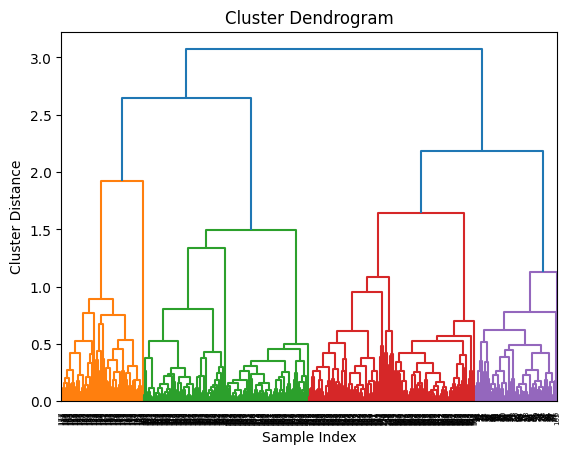

In [19]:
#path
path = 'clustering.csv'

#read file
data =  pd.read_csv(path, header=None)
table = data[[0,1]]

#using average linkage Verfahren
print(data)

model = AgglomerativeClustering( n_clusters= None, distance_threshold= 0, linkage= 'average' )
model.fit(data)

#Dendrogramm
linked = linkage(table, 'average')
dendrogram(linked, orientation= 'top', distance_sort = 'descending', show_leaf_counts= True)
#plot
plt.title('Cluster Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()




e) Wenden Sie das Clusteringverfahren Average Linkage (aus `sklearn`) auf die Daten aus d) an. Wählen Sie eine geeignte Anzahl von Clustern und visualisieren Sie das Ergebnis, sodass erkennbar ist, welcher Punkt zu welchem Cluster gehört.

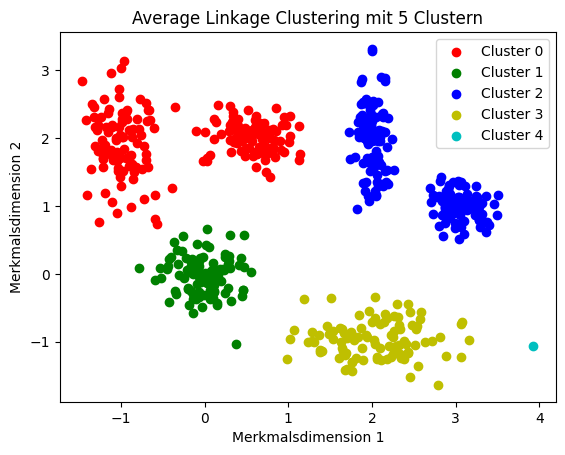

In [22]:
#path
path = 'clustering.csv'

#file lesen
data =  pd.read_csv(path, header=None)
table = data.values

#using average linkage Verfahren
n_clusters = 5

# Clustering durchführen
model = AgglomerativeClustering( n_clusters= n_clusters,  linkage= 'average' )
labels = model.fit_predict(table)

# Visualisieren Sie die Ergebnisse
# plt.figure(figsize=(10, 10)) #Optional
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for cluster_label in range(n_clusters):
    plt.scatter(table[labels == cluster_label][:, 0], table[labels == cluster_label][:, 1], label=f'Cluster {cluster_label}', c=colors[cluster_label])

#plot
plt.xlabel('Merkmalsdimension 1')
plt.ylabel('Merkmalsdimension 2')
plt.title(f'Average Linkage Clustering mit {n_clusters} Clustern')
plt.legend()
plt.show()
